In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as mat
import seaborn as sn

In [2]:
df=pd.read_csv('cities_r2.csv')
df

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Vizianagaram,28,ANDHRA PRADESH,12,227533,111596,115937,20487,10495,9992,...,80306,1039,952,81.85,88.18,75.80,"18.1066576,83.3955506",30656,19173,11483
489,Warangal,28,ANDHRA PRADESH,9,620116,310400,309716,55392,28434,26958,...,217136,998,948,84.16,91.54,76.79,"17.9689008,79.5940544",109613,69507,40106
490,Wardha,27,MAHARASHTRA,8,105543,53241,52302,9754,5139,4615,...,43339,982,898,94.05,97.19,90.88,"20.745319,78.6021946",19363,10645,8718
491,Yamunanagar,6,HARYANA,3,216628,115404,101224,22905,12556,10349,...,74255,877,824,85.91,89.61,81.71,"30.1290485,77.2673901",29803,14349,15454


In [3]:
df.columns

Index(['name_of_city', 'state_code', 'state_name', 'dist_code',
       'population_total', 'population_male', 'population_female',
       '0-6_population_total', '0-6_population_male', '0-6_population_female',
       'literates_total', 'literates_male', 'literates_female', 'sex_ratio',
       'child_sex_ratio', 'effective_literacy_rate_total',
       'effective_literacy_rate_male', 'effective_literacy_rate_female',
       'location', 'total_graduates', 'male_graduates', 'female_graduates'],
      dtype='object')

In [4]:
df_n=df.drop(['name_of_city','state_name','location'],axis=1)

In [5]:
df_n

,state_code,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates
0,3,9,145238,76840,68398,15870,8587,7283,103319,58347,44972,890,848,79.86,85.49,73.59,16287,8612,7675
1,27,7,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,8863,5269,3594
2,28,1,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,10565,6797,3768
3,20,24,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,19225,12189,7036
4,28,21,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,11902,7871,4031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,28,12,227533,111596,115937,20487,10495,9992,169461,89155,80306,1039,952,81.85,88.18,75.80,30656,19173,11483
489,28,9,620116,310400,309716,55392,28434,26958,475247,258111,217136,998,948,84.16,91.54,76.79,109613,69507,40106
490,27,8,105543,53241,52302,9754,5139,4615,90091,46752,43339,982,898,94.05,97.19,90.88,19363,10645,8718
491,6,3,216628,115404,101224,22905,12556,10349,166419,92164,74255,877,824,85.91,89.61,81.71,29803,14349,15454


In [6]:
tp=[]
for k in range(1,11):
    km=KMeans(n_clusters=k).fit(df_n)
    tp.append(km.inertia_)
tp

[1321369914205949.8,
 377703299795201.6,
 190534917949213.47,
 95360186364913.27,
 61716866691760.195,
 41516401685789.46,
 27918005945224.766,
 19709069350872.895,
 14931484046387.44,
 11088364349867.52]

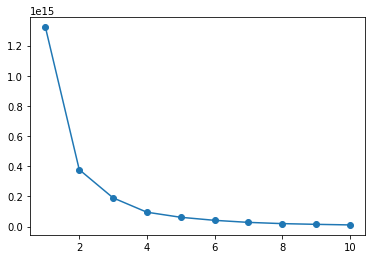

In [7]:
mat.plot(range(1,11),tp,'o-')
mat.show()

In [8]:
kmm=KMeans(n_clusters=2).fit(df_n)
df_n['Labels']=kmm.labels_

/home/patil/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


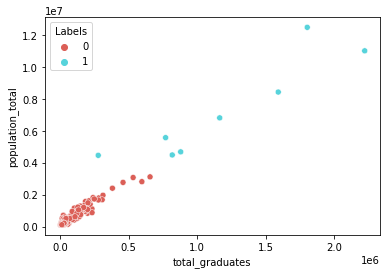

In [9]:
sn.scatterplot(df_n['total_graduates'],df_n['population_total'],hue=df_n['Labels'],palette=sn.color_palette('hls',2))
mat.show()

/home/patil/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


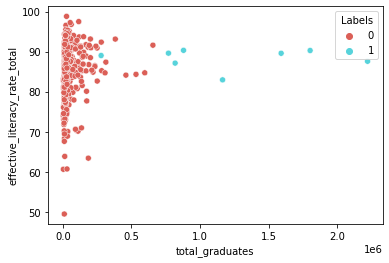

In [10]:
sn.scatterplot(df_n['total_graduates'],df_n['effective_literacy_rate_total'],hue=df_n['Labels'],palette=sn.color_palette('hls',2))
mat.show()

In [11]:
#HIERARCHICAL ITHN
df_n

,state_code,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates,Labels
0,3,9,145238,76840,68398,15870,8587,7283,103319,58347,44972,890,848,79.86,85.49,73.59,16287,8612,7675,0
1,27,7,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,8863,5269,3594,0
2,28,1,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,10565,6797,3768,0
3,20,24,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,19225,12189,7036,0
4,28,21,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,11902,7871,4031,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,28,12,227533,111596,115937,20487,10495,9992,169461,89155,80306,1039,952,81.85,88.18,75.80,30656,19173,11483,0
489,28,9,620116,310400,309716,55392,28434,26958,475247,258111,217136,998,948,84.16,91.54,76.79,109613,69507,40106,0
490,27,8,105543,53241,52302,9754,5139,4615,90091,46752,43339,982,898,94.05,97.19,90.88,19363,10645,8718,0
491,6,3,216628,115404,101224,22905,12556,10349,166419,92164,74255,877,824,85.91,89.61,81.71,29803,14349,15454,0


In [12]:
from sklearn.preprocessing import normalize
d_s=normalize(df_n)
d_s=pd.DataFrame(d_s,columns=df_n.columns)
d_s

,state_code,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates,Labels
0,0.000014,0.000041,0.659105,0.348708,0.310397,0.072020,0.038969,0.033051,0.468872,0.264785,0.204088,0.004039,0.003848,0.000362,0.000388,0.000334,0.073912,0.039082,0.034830,0.0
1,0.000151,0.000039,0.626864,0.325208,0.301656,0.065928,0.034533,0.031395,0.515998,0.275475,0.240523,0.005180,0.005074,0.000514,0.000529,0.000497,0.049477,0.029414,0.020063,0.0
2,0.000157,0.000006,0.659193,0.332617,0.326575,0.073580,0.037798,0.035782,0.471450,0.259970,0.211480,0.005514,0.005318,0.000452,0.000495,0.000408,0.059328,0.038169,0.021159,0.0
3,0.000075,0.000090,0.654041,0.343940,0.310101,0.086618,0.045346,0.041271,0.473592,0.268664,0.204928,0.003391,0.003421,0.000314,0.000338,0.000287,0.072269,0.045820,0.026449,0.0
4,0.000116,0.000087,0.692797,0.344212,0.348584,0.076569,0.038917,0.037652,0.421376,0.233805,0.187571,0.004214,0.004027,0.000284,0.000319,0.000251,0.049513,0.032743,0.016769,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.000080,0.000034,0.649162,0.318389,0.330774,0.058450,0.029943,0.028508,0.483480,0.254363,0.229117,0.002964,0.002716,0.000234,0.000252,0.000216,0.087463,0.054701,0.032762,0.0
489,0.000029,0.000009,0.639769,0.320237,0.319532,0.057148,0.029335,0.027812,0.490309,0.266291,0.224018,0.001030,0.000978,0.000087,0.000094,0.000079,0.113087,0.071710,0.041377,0.0
490,0.000157,0.000047,0.613469,0.309464,0.304006,0.056695,0.029870,0.026825,0.523655,0.271746,0.251908,0.005708,0.005220,0.000547,0.000565,0.000528,0.112548,0.061874,0.050673,0.0
491,0.000018,0.000009,0.640701,0.341320,0.299381,0.067744,0.037136,0.030608,0.492202,0.272585,0.219617,0.002594,0.002437,0.000254,0.000265,0.000242,0.088146,0.042439,0.045707,0.0


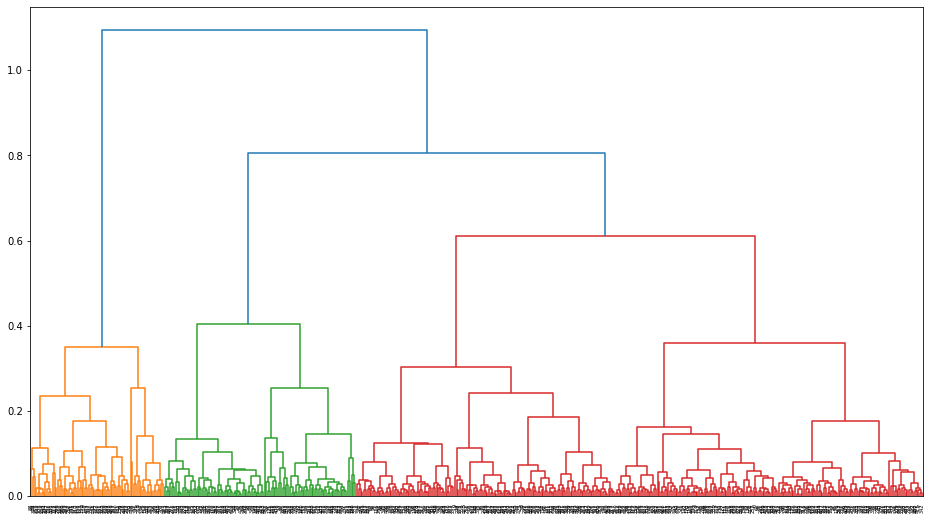

In [13]:
import scipy.cluster.hierarchy as shc
mat.figure(figsize=(16,9))
dend=shc.dendrogram(shc.linkage(d_s,method='ward'))

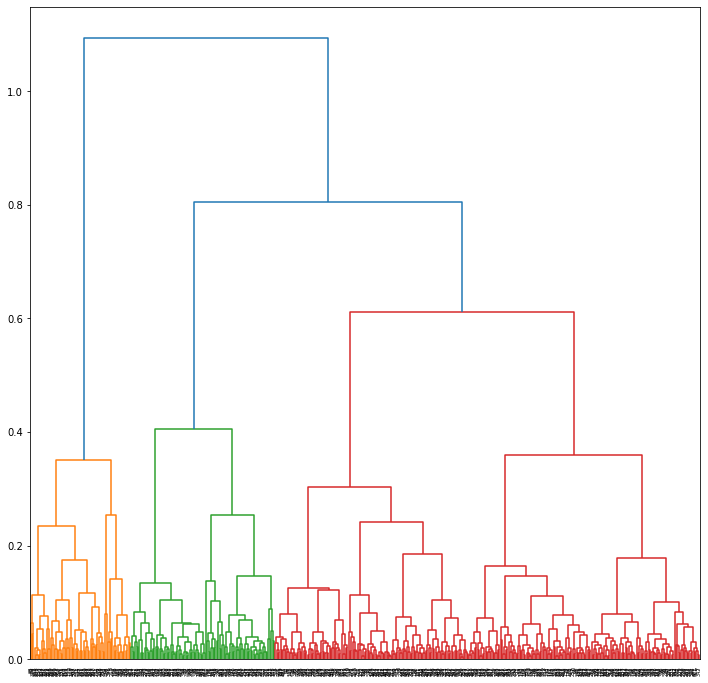

In [14]:
import scipy.cluster.hierarchy as shc
mat.figure(figsize=(12,12))
dend=shc.dendrogram(shc.linkage(d_s,method='ward'))
mat.axhline(y=2)


In [15]:
cls=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cls.fit_predict(d_s)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

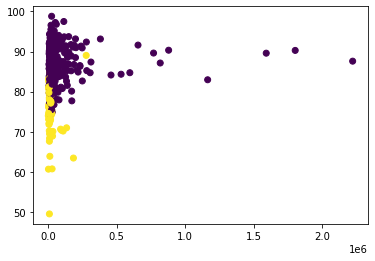

In [16]:

mat.scatter(df['total_graduates'],df['effective_literacy_rate_total'],c=cls.labels_)

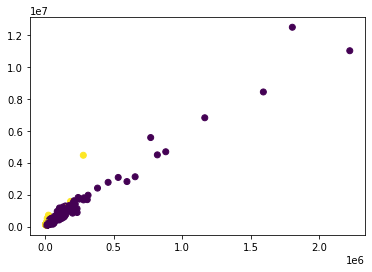

In [17]:

mat.scatter(df['total_graduates'],df['population_total'],c=cls.labels_)